<a href="https://colab.research.google.com/github/NgocCanh2002/Colab-cua-Ngoc-Canh/blob/main/20_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import skufuzzy as fuzz
x = np.arange(11)
mfx = fuzz.trimf(x,[0,5,10])

ModuleNotFoundError: ignored

In [4]:
pip install -U scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 4.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=63d561d4cb621f82e31561baed8051967678e6a24a5f622bd37166fecba0db99
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [5]:
import numpy as np
import skfuzzy as fuzz
x = np.arange(11)
mfx = fuzz.trimf(x,[0,5,10])
x
mfx

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

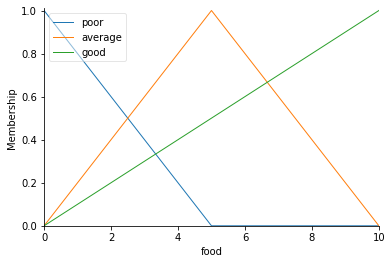

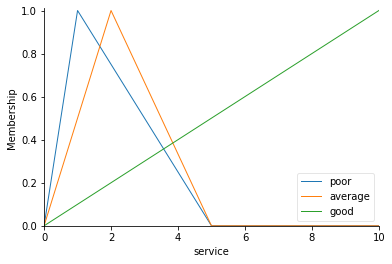

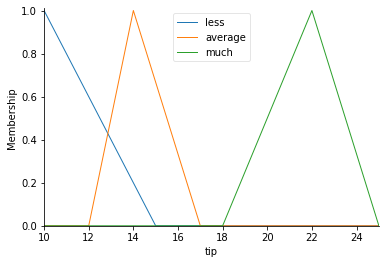

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),"food")
service = ctrl.Antecedent(np.arange(0,11,1),"service")
tip = ctrl.Consequent(np.arange(10,26,1),"tip")

food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[0,10,12])

service['poor'] = fuzz.trimf(service.universe,[0,1,5])
service['average'] = fuzz.trimf(service.universe,[0,2,5])
service['good'] = fuzz.trimf(service.universe,[0,10,13])

tip['less'] = fuzz.trimf(tip.universe,[0,10,15])
tip['average'] = fuzz.trimf(tip.universe,[12,14,17])
tip['much'] = fuzz.trimf(tip.universe,[18,22,25])

food.view()
service.view()
tip.view()

17.337164750957857


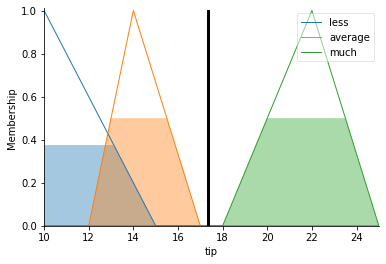

In [7]:
rule1= ctrl.Rule(food['poor'] & service['poor'],tip['less'])
rule2= ctrl.Rule(food['poor'] & service['average'],tip['less'])
rule3= ctrl.Rule(food['poor'] & service['good'],tip['average'])
rule4= ctrl.Rule(food['average'] & service['poor'],tip['less'])
rule5=ctrl.Rule(food['average'] & service['average'],tip['average'])
rule6=ctrl.Rule(food['average'] & service['good'],tip['much'])
rule7=ctrl.Rule(food['good'] & service['poor'],tip['average'])
rule8=ctrl.Rule(food['good'] & service['average'],tip['much'])
rule9=ctrl.Rule(food['poor'] & service['good'],tip['much'])
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping= ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']= 6.2
tipping.input['service']=3.5
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

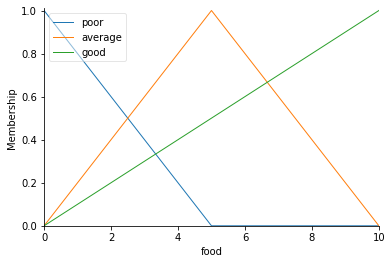

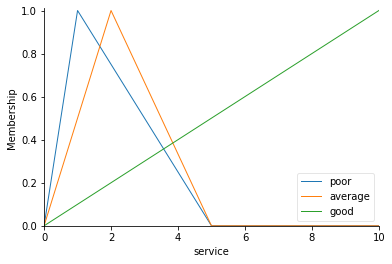

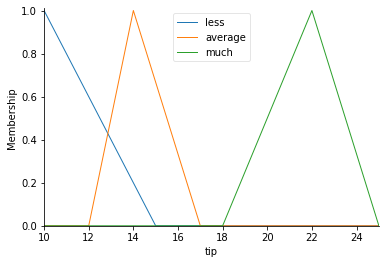

In [11]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(0,11,1),"time")
rice = ctrl.Antecedent(np.arange(0,11,1),"rice")
power = ctrl.Consequent(np.arange(10,26,1),"power")

time['slow'] = fuzz.trimf(time.universe,[0,5,10])
time['average'] = fuzz.trimf(food.universe,[5,10,15])
time['fast'] = fuzz.trimf(food.universe,[0,10,12])

rice['slow'] = fuzz.trimf(service.universe,[0,1,5])
rice['average'] = fuzz.trimf(service.universe,[0,2,5])
rice['fast'] = fuzz.trimf(service.universe,[0,10,13])

power['slow'] = fuzz.trimf(tip.universe,[0,10,15])
power['average'] = fuzz.trimf(tip.universe,[12,14,17])
power['fast'] = fuzz.trimf(tip.universe,[18,22,25])

food.view()
service.view()
tip.view()

29.676965510009037


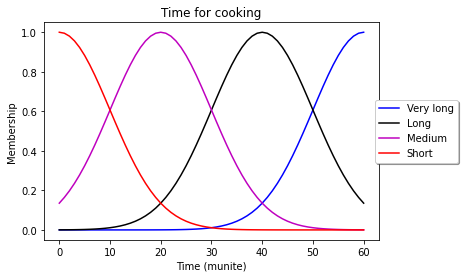

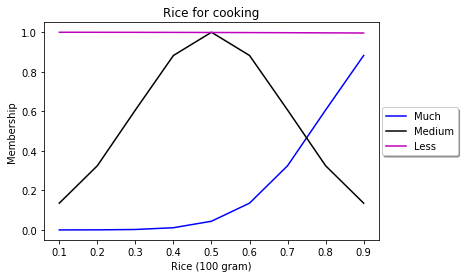

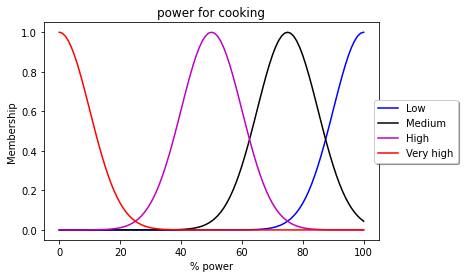

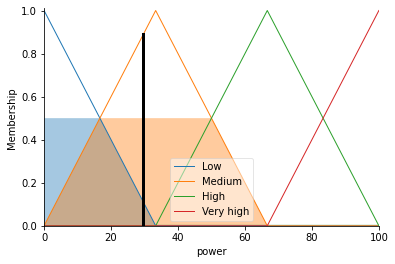

In [14]:
#BTVN
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

%matplotlib inline

time = ctrl.Antecedent(np.arange(0,61,1),'time')
rice = ctrl.Antecedent(np.arange(0.1,1,0.1),'rice')
power = ctrl.Consequent(np.arange(0,101,1),'power')

very_long=fuzz.gaussmf(time.universe,60,10)
long=fuzz.gaussmf(time.universe,40,10)
medium=fuzz.gaussmf(time.universe,20,10)
short=fuzz.gaussmf(time.universe,0,10)

much=fuzz.gaussmf(rice.universe,1,0.2)
medium_r=fuzz.gaussmf(rice.universe,0.5,0.2)
less=fuzz.gaussmf(rice.universe,0,10.2)

h_low=fuzz.gaussmf(power.universe,100,10)
h_medium=fuzz.gaussmf(power.universe,75,10)
h_high=fuzz.gaussmf(power.universe,50,10)
h_very_high=fuzz.gaussmf(power.universe,0,10)

plt.plot(time.universe,very_long,'b',linewidth=1.5, label='Very long')
plt.plot(time.universe,long,'k',linewidth=1.5, label='Long')
plt.plot(time.universe,medium,'m',linewidth=1.5, label='Medium')
plt.plot(time.universe,short,'r',linewidth=1.5, label='Short')
plt.title('Time for cooking')
plt.ylabel('Membership')
plt.xlabel('Time (munite)')
plt.legend(loc='center right',bbox_to_anchor=(1.25,0.5),ncol=1,fancybox=True, shadow=True)
plt.figure()
plt.plot(rice.universe,much,'b',linewidth=1.5, label='Much')
plt.plot(rice.universe,medium_r,'k',linewidth=1.5, label='Medium')
plt.plot(rice.universe,less,'m',linewidth=1.5, label='Less')
plt.title('Rice for cooking')
plt.ylabel('Membership')
plt.xlabel('Rice (100 gram)')
plt.legend(loc='center right',bbox_to_anchor=(1.25,0.5),ncol=1,fancybox=True, shadow=True)
power=ctrl.Consequent(np.arange(0,101,1),'power')
plt.figure()
plt.plot(power.universe,h_low,'b',linewidth=1.5, label='Low')
plt.plot(power.universe,h_medium,'k',linewidth=1.5, label='Medium')
plt.plot(power.universe,h_high,'m',linewidth=1.5, label='High')
plt.plot(power.universe,h_very_high,'r',linewidth=1.5, label='Very high')
plt.title('power for cooking')
plt.ylabel('Membership')
plt.xlabel('% power')
plt.legend(loc='center right',bbox_to_anchor=(1.25,0.5),ncol=1,fancybox=True, shadow=True)
import numpy as np
import skfuzzy.control as ctrl
x_rice = np.linspace(0, 1000, num=100)
x_time = np.linspace(0, 60, num=60)
x_power = np.linspace(0, 100, num=100)
rice = ctrl.Antecedent(x_rice, 'rice')
time = ctrl.Antecedent(x_time, 'time')
power = ctrl.Consequent(x_power, 'power')
names_rice = ['Less', 'Medium', 'Much']
names_time = ['Short', 'Medium', 'Long','Very Long']
names_power = ['Low', 'Medium', 'High','Very high']
rice.automf(names=names_rice)
time.automf(names=names_time)
power.automf(names=names_power)

rule1 = ctrl.Rule(rice['Less'] & time['Short'], power['Medium'])
rule2 = ctrl.Rule(rice['Medium'] & time['Short'], power['High'])
rule3 = ctrl.Rule(rice['Much'] & time['Short'], power['Very high'])
rule4 = ctrl.Rule(rice['Less'] & time['Medium'], power['Low'])
rule5 = ctrl.Rule(rice['Medium'] & time['Medium'], power['Medium'])
rule6 = ctrl.Rule(rice['Much'] & time['Medium'], power['High'])
rule7 = ctrl.Rule(rice['Less'] & time['Long'], power['Low'])
rule8 = ctrl.Rule(rice['Medium'] & time['Long'], power['Low'])
rule9 = ctrl.Rule(rice['Much'] & time['Long'], power['Medium'])
rule10 = ctrl.Rule(rice['Less'] & time['Very Long'], power['Low'])
rule11 = ctrl.Rule(rice['Medium'] & time['Very Long'], power['Low'])
rule12 = ctrl.Rule(rice['Much'] & time['Very Long'], power['Low'])
system_ctrl= ctrl.ControlSystem(rules=[rule1, rule1, rule2, rule3, rule4,
rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
system=ctrl.ControlSystemSimulation(system_ctrl)
system.input['rice']=500
system.input['time']=30
system.compute()
print(system.output['power'])
power.view(sim=system)